<a href="https://colab.research.google.com/github/nirezuluet/ML-from-scratch-/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# implementation of KNN from scratch
import numpy as np
import math

In [22]:
def compute_distance(x, y):
  # return the euclidean distance between x and y
  return math.sqrt(np.sum((x - y)**2))

In [23]:
def most_frequent(list_):
  #return the most frequent element in the list

  #fist create a dictionary for counting the total number of ocurrences of each element
  counter = {}

  for item in list_:
    counter[item] = counter.get(item,0) + 1

  #now getting the item with the maximum count
  counter_list = list(counter.items()) #this give me a list of tuples of the form <key,val>
  counter_list.sort(key= lambda x: x[1], reverse= True)

  return counter_list[0][0] #this is the most frequent label





In [25]:
class KNN:

  def __init__(self, k):
    self.k = k

  def fit(self, X, y):
    self.X = X
    self.y = y


  def predict(self, x):

    # find the distance of x to each sample of the training set
    distances = [compute_distance(x, training_sample) for training_sample in self.X]

    #sorting the training_samples according to distance values
    sorted_samples= np.argsort(distances)

    #getting the top k samples from the list
    top_k = self.y[sorted_samples[:self.k]]

    #getting the most popular k labels
    return most_frequent(top_k)

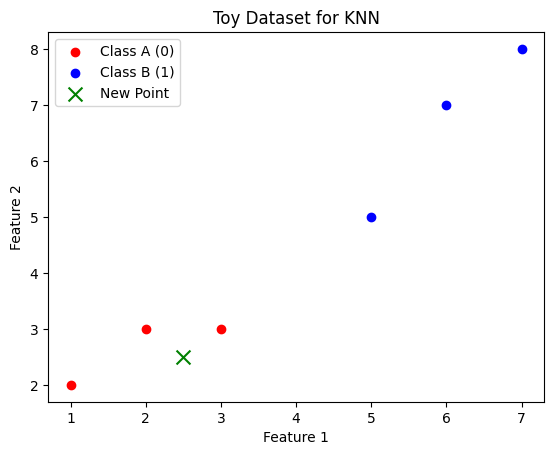

In [19]:
import matplotlib.pyplot as plt

# Training data (features: x, y)
X_train = np.array([
    [1, 2], [2, 3], [3, 3], [5, 5], [6, 7], [7, 8]
])

# Labels (0 = Red, 1 = Blue)
y_train = np.array([0, 0, 0, 1, 1, 1])

# New point to classify
X_test = np.array([[2.5, 2.5]])

# Visualizing the dataset
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color="red", label="Class A (0)")
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color="blue", label="Class B (1)")
plt.scatter(X_test[:, 0], X_test[:, 1], color="green", marker="x", s=100, label="New Point")

plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Toy Dataset for KNN")
plt.show()

In [26]:
knn = KNN(3)
knn.fit(X_train, y_train)
label = knn.predict(X_test)
print(label)

[0 0 0]
0
